<a href="https://colab.research.google.com/github/Nethrav22/Datathon/blob/main/Datathon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import collections

In [ ]:
import glob

# Importing drive method from colab for accessing google drive
from google.colab import drive
# special libraries to allow file access
from google.colab import drive as mountGoogleDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# These commands allow you to read directly from SafeGraph's public GoogleDrive containing Census Data and Sample Data
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!")

You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!


In [ ]:
import pandas as pd

In [ ]:
def pd_read_csv_drive(id, drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.gz')  
  return(pd.read_csv('Filename.gz',dtype=dtype))

def get_drive_id(filename):
    # Note: OpenCensusData public GDrive folder: https://drive.google.com/open?id=1btSS6zo7_wJCCXAigkbhnaoeU-Voa9pG
    # Note: Sample of SafeGraph Places data public GDrive folder: https://drive.google.com/open?id=1PRYLkWNlO-_5EXwFmUZbYbtr_UJmKjBq
    drive_ids = {
                 'neighborhood_patterns.gz':'1kXXIOoRCoCEy3BWUBa15dsoOMz0rU0Uu',
                 '2020-07-01-social-distancing.csv.gz':'19V3aZGRVt7d80DInZexkzDGMdvoG22La',
                 '2020-07-02-social-distancing.csv.gz':'1aQDOyw40Vj-lGq7rQCrl5mHQ7b0YkQEJ',
                 '2020-07-03-social-distancing.csv.gz':'1toG4xDpRiIZMvw1pCvURUiuND_61ih3R'
                 }
    return(drive_ids[filename])



In [ ]:
social_dist1 = pd_read_csv_drive(get_drive_id('2020-07-01-social-distancing.csv.gz'), drive=drive)
social_dist2 = pd_read_csv_drive(get_drive_id('2020-07-02-social-distancing.csv.gz'), drive=drive)
social_dist3 = pd_read_csv_drive(get_drive_id('2020-07-03-social-distancing.csv.gz'), drive=drive)
frames=[social_dist1,social_dist2,social_dist3]

social_dist=pd.concat(frames)
social_dist=social_dist.rename(columns={'origin_census_block_group': 'area'})
social_dist.head()

,area,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home
0,10539707003,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,46,1271,"{""16001-50000"":1,""0"":12,"">50000"":8,""2001-8000""...","{""16001-50000"":18,"">50000"":81,""<1000"":121,""200...",12,827,"{""721-1080"":11,""361-720"":8,""61-360"":2,""<60"":8,...","[34,34,33,34,34,31,25,25,24,20,20,19,22,19,19,...",1,1,"{""010030107031"":1,""011310348002"":1,""1203300120...",1,126,69,"{""21-45"":3,""481-540"":3,""541-600"":1,""46-60"":2,""...",83,"{""0-25"":5,""76-100"":24,""51-75"":11,""26-50"":3}",782,237,4856
1,10730144081,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,135,1865,"{""16001-50000"":17,""0"":42,"">50000"":10,""2001-800...","{""16001-50000"":61,"">50000"":108,""<1000"":123,""20...",39,789,"{""721-1080"":29,""361-720"":18,""61-360"":14,""<60"":...","[89,89,87,89,91,88,90,83,77,65,57,52,58,57,63,...",13,7,"{""010730038024"":1,""010730108041"":2,""0111703031...",3,122,217,"{""21-45"":6,""481-540"":8,""541-600"":6,""46-60"":2,""...",81,"{""0-25"":26,""76-100"":73,""51-75"":26,""26-50"":6}",740,283,15348
2,10890017002,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,71,1511,"{""16001-50000"":5,""0"":20,"">50000"":2,""2001-8000""...","{""16001-50000"":18,"">50000"":771,""<1000"":288,""20...",19,898,"{""721-1080"":17,""361-720"":11,""61-360"":6,""<60"":8...","[51,53,51,49,51,51,50,54,44,39,33,35,36,34,37,...",15,1,"{""010890020003"":2,""010950302023"":2,""0108901070...",3,148,94,"{""21-45"":1,""481-540"":2,""541-600"":2,""46-60"":1,""...",82,"{""0-25"":12,""76-100"":39,""51-75"":18,""26-50"":1}",805,287,2139
3,10950308022,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,97,3379,"{""16001-50000"":6,""0"":19,"">50000"":11,""2001-8000...","{""16001-50000"":491,"">50000"":110,""<1000"":66,""20...",20,755,"{""721-1080"":24,""361-720"":15,""61-360"":6,""<60"":2...","[59,61,58,57,56,60,48,44,37,31,33,37,32,34,32,...",11,4,"{""120050015021"":1,""132330102005"":1,""1311500060...",4,251,135,"{""21-45"":3,""481-540"":3,""541-600"":1,""46-60"":1,""...",69,"{""0-25"":22,""76-100"":39,""51-75"":21,""26-50"":8}",687,371,4284
4,10970066004,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,153,4715,"{""16001-50000"":46,""0"":40,"">50000"":12,""2001-800...","{""16001-50000"":49,"">50000"":63,""<1000"":39,""2001...",41,790,"{""721-1080"":36,""361-720"":23,""61-360"":10,""<60"":...","[104,100,107,102,103,100,92,86,80,70,68,60,64,...",17,5,"{""280590427001"":1,""010810418003"":1,""0100301070...",8,147,218,"{""21-45"":9,""481-540"":10,""541-600"":8,""46-60"":5,...",74,"{""0-25"":34,""76-100"":74,""51-75"":37,""26-50"":5}",740,300,16203


In [ ]:
def pd_read_csv_drive(id, drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))

def get_drive_id(filename):
    # Note: OpenCensusData public GDrive folder: https://drive.google.com/open?id=1btSS6zo7_wJCCXAigkbhnaoeU-Voa9pG
    # Note: Sample of SafeGraph Places data public GDrive folder: https://drive.google.com/open?id=1PRYLkWNlO-_5EXwFmUZbYbtr_UJmKjBq
    drive_ids = {'cbg.geojson' : '19FIPhdpDTw_hKZemRvqu2V6OiFn5KjQ1',
                 'cbg_b01.csv' : '1QqttoDRoKpZM2TyyRwJ8B9c5bYZrHysB',
                 'cbg_b02.csv' : '1Zqqf3iLDkDWPl2theLlUm_cAbvznj-Kx',
                 'cbg_b03.csv' : '1LVvZfx3hHiwN3YBh7pz43Y2KWV61OJFA',
                 'cbg_b19.csv' : '1d9GscpWbrnP2xNLKKlgd6xLcFTzJydY4',
                 'cbg_b15.csv' : '1xeSZShcX3egZFsalGOFD6Ze2jTof6ri-',
                 'cbg_b11.csv' : '1omMDkYqWaNqGVLXOfPtPOw88-CjG_6XF',
                 # You can look up the IDs for other cbg files here: https://drive.google.com/open?id=1btSS6zo7_wJCCXAigkbhnaoeU-Voa9pG 
                 'cbg_field_descriptions.csv' : '1a7_7WxY6eaUIObkVwfknl9C7nPltYxPd',
                 'cbg_fips_codes.csv' : '1dB_HeAw11TmsZ8MATMedC9j2csTRAiVm',
                 'neighborhood_patterns.gz':'1kXXIOoRCoCEy3BWUBa15dsoOMz0rU0Uu'
                 }
    return(drive_ids[filename])

In [ ]:
# load data
cbg_19_desc = pd_read_csv_drive(get_drive_id('cbg_b19.csv'), drive=drive)
cbg_15_desc = pd_read_csv_drive(get_drive_id('cbg_b15.csv'), drive=drive)
cbg_01_desc = pd_read_csv_drive(get_drive_id('cbg_b01.csv'), drive=drive)

# rename cbg_19
cbg_19_desc=cbg_19_desc.rename(columns={'B19013e1': 'Median_House_Income','census_block_group':'area'})

# rename cbg_15
education = cbg_15_desc[['census_block_group','B15003e22','B15003e1']]
education = education.rename(columns ={'B15003e1':'population','B15003e22': 'Edu_attainment','census_block_group':'area'})

# rename cbg_01
age = cbg_01_desc[['census_block_group','B01002e1','B01001e26','B01001e2']]
age = age.rename(columns ={'B01002e1': 'Median_age','B01001e26':'Num_of_females','B01001e2':'Num_of_males','census_block_group':'area'})

In [ ]:
# Combine dataframes based on FIP location
combine_df=pd.merge(social_dist, cbg_19_desc, on="area")
combine_df=pd.merge(combine_df,education, on="area")
combine_df=pd.merge(combine_df,age, on="area")

combine_df.head()

,area,date_range_start,date_range_end,device_count,distance_traveled_from_home,bucketed_distance_traveled,median_dwell_at_bucketed_distance_traveled,completely_home_device_count,median_home_dwell_time,bucketed_home_dwell_time,at_home_by_each_hour,part_time_work_behavior_devices,full_time_work_behavior_devices,destination_cbgs,delivery_behavior_devices,median_non_home_dwell_time,candidate_device_count,bucketed_away_from_home_time,median_percentage_time_home,bucketed_percentage_time_home,mean_home_dwell_time,mean_non_home_dwell_time,mean_distance_traveled_from_home,B19001e1,B19001m1,B19001e2,B19001m2,B19001e3,B19001m3,B19001e4,B19001m4,B19001e5,B19001m5,B19001e6,B19001m6,B19001e7,B19001m7,B19001e8,B19001m8,B19001e9,...,B19301Bm1,B19301Ce1,B19301Cm1,B19301De1,B19301Dm1,B19301Ee1,B19301Em1,B19301Fe1,B19301Fm1,B19301Ge1,B19301Gm1,B19301He1,B19301Hm1,B19301Ie1,B19301Im1,B19313e1,B19313m1,B19313Ae1,B19313Am1,B19313Be1,B19313Bm1,B19313Ce1,B19313Cm1,B19313De1,B19313Dm1,B19313Ee1,B19313Em1,B19313Fe1,B19313Fm1,B19313Ge1,B19313Gm1,B19313He1,B19313Hm1,B19313Ie1,B19313Im1,Edu_attainment,population,Median_age,Num_of_females,Num_of_males
0,10539707003,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,46,1271,"{""16001-50000"":1,""0"":12,"">50000"":8,""2001-8000""...","{""16001-50000"":18,"">50000"":81,""<1000"":121,""200...",12,827,"{""721-1080"":11,""361-720"":8,""61-360"":2,""<60"":8,...","[34,34,33,34,34,31,25,25,24,20,20,19,22,19,19,...",1,1,"{""010030107031"":1,""011310348002"":1,""1203300120...",1,126,69,"{""21-45"":3,""481-540"":3,""541-600"":1,""46-60"":2,""...",83,"{""0-25"":5,""76-100"":24,""51-75"":11,""26-50"":3}",782,237,4856,272,86,41,38,45,53,0,11,38,45,24,21,23,36,0,11,13,...,5466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18930.0,6308.0,NaN,NaN,10621600.0,4116505.0,8613000.0,3654923.0,2008600.0,2105045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8613000.0,3654923.0,NaN,NaN,64,456,42.8,539,164
1,10539707003,2020-07-02T00:00:00-05:00,2020-07-03T00:00:00-05:00,42,1395,"{""16001-50000"":1,""0"":10,"">50000"":4,""2001-8000""...","{""16001-50000"":696,"">50000"":15,""<1000"":19,""200...",11,889,"{""721-1080"":10,""361-720"":6,""61-360"":3,""<60"":2,...","[33,33,32,33,34,34,31,28,24,23,20,20,21,21,20,...",4,2,"{""010030107031"":1,""010539706003"":6,""0100301080...",1,70,70,"{""21-45"":3,""481-540"":1,""541-600"":1,""46-60"":1,""...",89,"{""0-25"":2,""76-100"":26,""51-75"":9,""26-50"":1}",889,201,6859,272,86,41,38,45,53,0,11,38,45,24,21,23,36,0,11,13,...,5466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18930.0,6308.0,NaN,NaN,10621600.0,4116505.0,8613000.0,3654923.0,2008600.0,2105045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8613000.0,3654923.0,NaN,NaN,64,456,42.8,539,164
2,10539707003,2020-07-03T00:00:00-05:00,2020-07-04T00:00:00-05:00,42,1126,"{""16001-50000"":6,""0"":9,"">50000"":5,""2001-8000"":...","{""16001-50000"":60,"">50000"":88,""<1000"":26,""2001...",9,923,"{""721-1080"":16,""361-720"":5,""61-360"":3,""<60"":3,...","[32,32,33,36,36,36,32,36,30,28,28,23,19,19,17,...",3,2,"{""010030114013"":1,""010030101001"":1,""0105397060...",2,130,70,"{""21-45"":3,""481-540"":1,""46-60"":1,""721-840"":1,""...",87,"{""0-25"":3,""76-100"":30,""51-75"":4,""26-50"":3}",856,215,6471,272,86,41,38,45,53,0,11,38,45,24,21,23,36,0,11,13,...,5466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18930.0,6308.0,NaN,NaN,10621600.0,4116505.0,8613000.0,3654923.0,2008600.0,2105045.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8613000.0,3654923.0,NaN,NaN,64,456,42.8,539,164
3,10730144081,2020-07-01T00:00:00-05:00,2020-07-02T00:00:00-05:00,135,1865,"{""16001-50000"":17,""0"":42,"">50000"":10,""2001-800...","{""16001-50000"":61,"">50000"":108,""<1000"":123,""20...",39,789,"{""721-1080"":29,""361-720"":18,""61-360"":14,""<60"":...","[89,89,87,89,91,88,90,83,77,65,57,52,58,57,63,...",13,7,"{""010730038024"":1,""010730108041"":2,""0111703031...",3,122,217,"{""21-45"":6,""481-540"":8,""541-600"":6,""46-60"":2,""...",81,"{""0-25"":26,""76-100"":73,""51-75"":26,""26-50"":6}",740

In [ ]:
# clean data

# select columns of interest
DF=combine_df[['area','mean_non_home_dwell_time','mean_distance_traveled_from_home','Median_House_Income','Median_age','Edu_attainment','Num_of_females','Num_of_males','population']]
print(len(DF))

# Check for NaN in for each column of interest
for (columnName, columnData) in DF.iteritems(): 
    print('Colunm Name : ', columnName) 
    print('Column Contents : ', columnData.values) 
    print('Column Nan vals : ', columnData.isnull().sum()) 
    print('Column Mean : ',columnData.mean())
    print('\n')


# remove columns without data


DF['Edu_attainment_ratio']=DF['Edu_attainment']/DF['population']
DF=DF.drop(columns=['Edu_attainment','population'])
DF=DF.dropna(axis=0, how='any')
print(len(DF))
DF.head()

656528
Colunm Name :  area
Column Contents :  [ 10539707003  10539707003  10539707003 ... 170898549001 261635533002
  60659810001]
Column Nan vals :  0
Column Mean :  286193323597.61285


Colunm Name :  mean_non_home_dwell_time
Column Contents :  [237 201 215 ... 191 170 289]
Column Nan vals :  0
Column Mean :  256.52020325104183


Colunm Name :  mean_distance_traveled_from_home
Column Contents :  [ 4856  6859  6471 ...     0  3454 63042]
Column Nan vals :  0
Column Mean :  12902.631293714814


Colunm Name :  Median_House_Income
Column Contents :  [26765. 26765. 26765. ...    nan 10625.    nan]
Column Nan vals :  16883
Column Mean :  60356.253451523895


Colunm Name :  Median_age
Column Contents :  [42.8 42.8 42.8 ... 43.8 17.8 38.8]
Column Nan vals :  1078
Column Mean :  39.92629140286194


Colunm Name :  Edu_attainment
Column Contents :  [ 64  64  64 ...  52   7 142]
Column Nan vals :  0
Column Mean :  185.4674377939707


Colunm Name :  Num_of_females
Column Contents :  [539 539 539 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,area,mean_non_home_dwell_time,mean_distance_traveled_from_home,Median_House_Income,Median_age,Num_of_females,Num_of_males,Edu_attainment_ratio
0,10539707003,237,4856,26765.0,42.8,539,164,0.140351
1,10539707003,201,6859,26765.0,42.8,539,164,0.140351
2,10539707003,215,6471,26765.0,42.8,539,164,0.140351
3,10730144081,283,15348,54980.0,29.8,1133,803,0.322917
4,10730144081,342,7691,54980.0,29.8,1133,803,0.322917


In [ ]:
# find mean for each column 
# Check for NaN in for each column of interest
dict_national_avg=dict()
targets={'mean_non_home_dwell_time','mean_distance_traveled_from_home'}

for (columnName, columnData) in DF.iteritems():
    if columnName in targets:
        cutoff=columnData.mean()
        
        string='nat_avg_'+columnName
        DF[string]=DF[columnName].apply(lambda x: 1 if cutoff < x  else 0)
      

In [ ]:
DF=DF.drop(columns=['mean_non_home_dwell_time','mean_distance_traveled_from_home'])
targets.add('area')
targets.add('Edu_attainment_ratio')

# stanardize  X - data
for (columnName, columnData) in DF.iteritems():
    if columnName not in targets:
        mn=min(DF[columnName])
        mx=max(DF[columnName])
        DF[columnName] = DF[columnName].apply( lambda x : ((x-mn)/(mx-mn)) )

DF['SD'] = DF['nat_avg_mean_non_home_dwell_time']+DF['nat_avg_mean_distance_traveled_from_home']
DF['SD']=DF['SD'].apply(lambda x: 1 if (x==2) else 0)
DF=DF.drop(columns=['nat_avg_mean_non_home_dwell_time','nat_avg_mean_distance_traveled_from_home'])
DF.head()

,area,Median_House_Income,Median_age,Num_of_females,Num_of_males,Edu_attainment_ratio,SD
0,10539707003,0.098044,0.429648,0.022308,0.005457,0.140351,0
1,10539707003,0.098044,0.429648,0.022308,0.005457,0.140351,0
2,10539707003,0.098044,0.429648,0.022308,0.005457,0.140351,0
3,10730144081,0.212043,0.266332,0.047216,0.027386,0.322917,1
4,10730144081,0.212043,0.266332,0.047216,0.027386,0.322917,0


In [ ]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


k=5
df_X = DF.drop(columns=['SD','area'])
s_y = DF['SD']

skf = StratifiedKFold(n_splits=k,shuffle=True,random_state=23)
# split into X & Y
d_train_df_X = dict()
d_test_df_X = dict()
d_train_s_y = dict()
d_test_s_y = dict()

# split foldss  into training and testing
k_folds=iter(skf.split(df_X,s_y))

# iterate each split using iter and savr into dic
for i in range(skf.get_n_splits()):
    # i = test split
    train_ind,test_ind=next(k_folds)# getith split
    
    # test set 
    d_test_df_X[i]=df_X.iloc[test_ind]
    d_test_s_y[i]=s_y.iloc[test_ind]
    #training set 
    d_train_df_X[i]=df_X.iloc[train_ind]
    d_train_s_y[i]=s_y.iloc[train_ind] 


# Look at the test data and verify that the target training is equally distributed as possible
#for key in d_test_s_y.keys():
   # print(d_test_s_y[key].value_counts())


## Random Foresst 

NameError: ignored

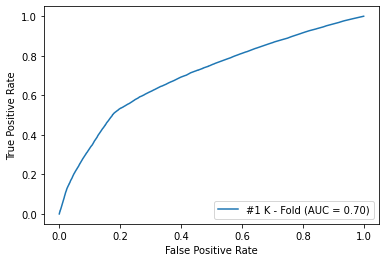

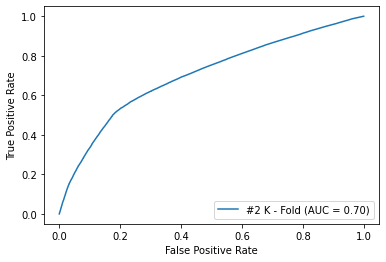

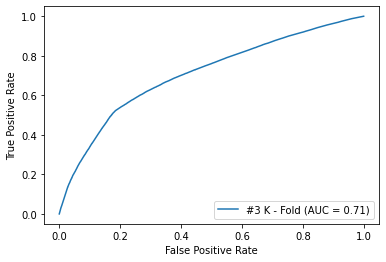

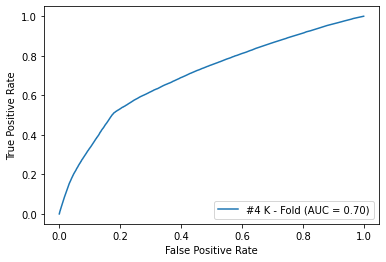

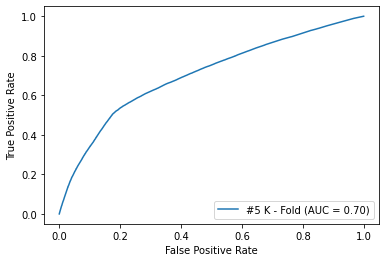

In [ ]:
# loop through the K -folds 

acc=[]
K_vals=[1,2,3,4,5]
for i in range(k):
    # Create Classifier

    forest=RandomForestClassifier(n_estimators=125,criterion="entropy")
    forest.fit(d_train_df_X[i],d_train_s_y[i])
    acc.append(forest.score(d_test_df_X[i],d_test_s_y[i]))
    
    #Plot Roc Curve 
    plot_roc_curve(forest,d_test_df_X[i],d_test_s_y[i],name=('#'+str(i+1)+' K - Fold'))


0.8127890303487536

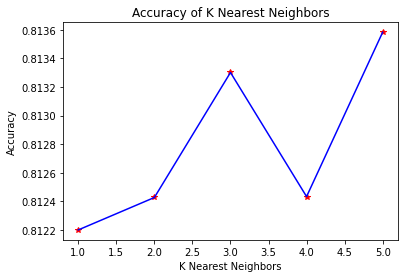

In [ ]:
plt.plot(K_vals,acc,'r*')
plt.plot(K_vals,acc,'b')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of K Nearest Neighbors')

sum(acc)/5


# ADABooster

In [ ]:
# loop through the K -folds 
for i in range(1):
    # Create Classifier
    boot=AdaBoostClassifier(n_estimators=50, random_state=23)
    boot.fit(d_train_df_X[i],d_train_s_y[i])
    
    # Predict 
    #clss=forest.predict(d_test_df_X[i])

    #Plot Roc Curve 
    plot_roc_curve(boot,d_test_df_X[i],d_test_s_y[i],name=('#'+str(i+1)+' K - Fold'))

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns #plotting tool 2 - statistics
sns.set()
p=DF.hist(figsize=(20,20))

In [ ]:
p=sns.pairplot(DF, hue ='SD')